# Basic Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Getting Dataset

In [2]:
datasets = pd.read_csv('gender_classification_v7.csv')
X = datasets.iloc[:, 0:7].values
y = datasets.iloc[:, 7].values
print(X)
print(y)
accuracyArray = []

[[ 1.  11.8  6.1 ...  0.   1.   1. ]
 [ 0.  14.   5.4 ...  0.   1.   0. ]
 [ 0.  11.8  6.3 ...  1.   1.   1. ]
 ...
 [ 1.  12.9  5.7 ...  0.   0.   0. ]
 [ 1.  13.2  6.2 ...  0.   0.   0. ]
 [ 1.  15.4  5.4 ...  1.   1.   1. ]]
['Male' 'Female' 'Male' ... 'Female' 'Female' 'Male']


## Dataset Preprocessing

In [3]:
y = np.where(y == 'Male', 1, 0)
print(y)

[1 0 1 ... 0 0 1]


In [4]:
print(y.size)

5001


## Splitting

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 / 50, random_state=0);

# Logistic Regression

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Predicting

In [8]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1
 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1
 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


### Confusion Matrix & Accuracy

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# print(cm)
correct_predictions = np.trace(cm)
total_predictions = np.sum(cm)
accuracy = correct_predictions / total_predictions
accuracyArray.append(accuracy)
print("Accuracy from confusion matrix:", accuracy)

Accuracy from confusion matrix: 0.9603960396039604


## Visualizing

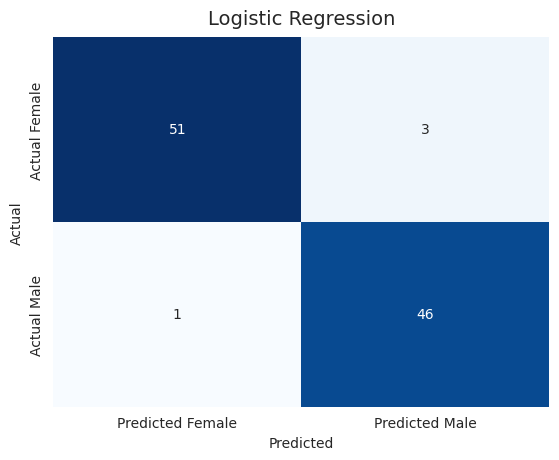

In [10]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Female', 'Predicted Male'],
            yticklabels=['Actual Female', 'Actual Male'])
plt.text(0.5, 1.05, 'Logistic Regression', size=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

# Support Vector Machine

In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

## linear

In [12]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

### Predicting

In [13]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1
 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1
 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


### Confusion Matrix & Accuracy

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# print(cm)
correct_predictions = np.trace(cm)
total_predictions = np.sum(cm)
accuracy = correct_predictions / total_predictions
accuracyArray.append(accuracy)
print("Accuracy from confusion matrix:", accuracy)

Accuracy from confusion matrix: 0.9603960396039604


## Visualizing

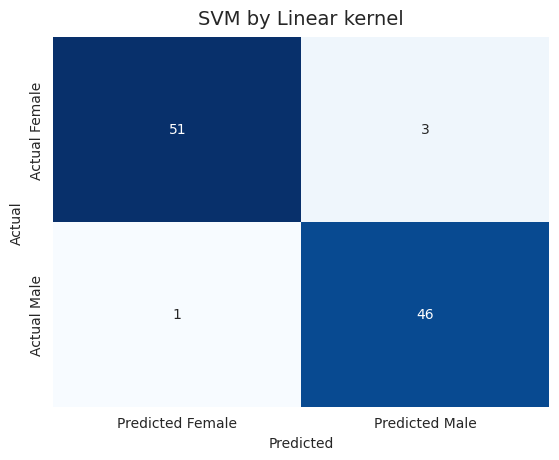

In [15]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Female', 'Predicted Male'],
            yticklabels=['Actual Female', 'Actual Male'])
plt.text(0.5, 1.05, 'SVM by Linear kernel', size=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

### poly

In [16]:
from sklearn.svm import SVC
classifier = SVC(kernel='poly', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

### Predicting

In [17]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1
 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1
 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0]


### Confusion Matrix & Accuracy

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# print(cm)
correct_predictions = np.trace(cm)
total_predictions = np.sum(cm)
accuracy = correct_predictions / total_predictions
accuracyArray.append(accuracy)
print("Accuracy from confusion matrix:", accuracy)

Accuracy from confusion matrix: 0.9603960396039604


## Visualizing

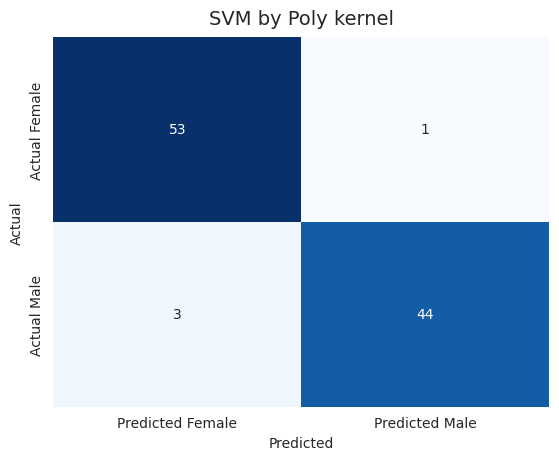

In [19]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Female', 'Predicted Male'],
            yticklabels=['Actual Female', 'Actual Male'])
plt.text(0.5, 1.05, 'SVM by Poly kernel', size=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

### Gaussian RBF

In [20]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

### Predicting

In [21]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1
 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1
 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0]


### Confusion Matrix & Accuracy

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# print(cm)
correct_predictions = np.trace(cm)
total_predictions = np.sum(cm)
accuracy = correct_predictions / total_predictions
accuracyArray.append(accuracy)
print("Accuracy from confusion matrix:", accuracy)

Accuracy from confusion matrix: 0.9702970297029703


## Visualizing

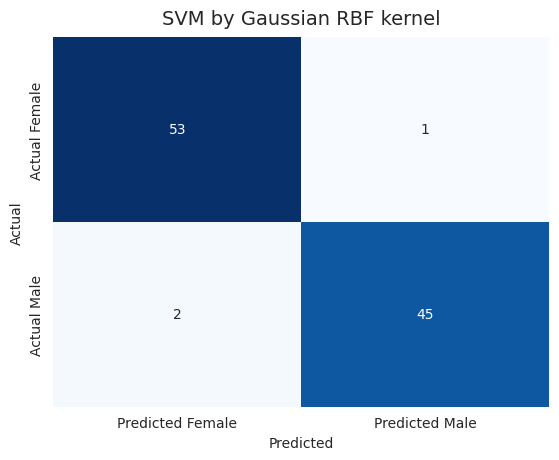

In [23]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Female', 'Predicted Male'],
            yticklabels=['Actual Female', 'Actual Male'])
plt.text(0.5, 1.05, 'SVM by Gaussian RBF kernel', size=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

# Decision Tree Regression

In [24]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train.reshape(-1, 1))

DecisionTreeRegressor(random_state=0)

### Predicting

In [25]:
y_pred = regressor.predict(X_test)
print(y_pred)

[0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0.]


### Confusion Matrix & Accuracy

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# print(cm)
correct_predictions = np.trace(cm)
total_predictions = np.sum(cm)
accuracy = correct_predictions / total_predictions
accuracyArray.append(accuracy)
print("Accuracy from confusion matrix:", accuracy)

Accuracy from confusion matrix: 0.9108910891089109


## Visualizing

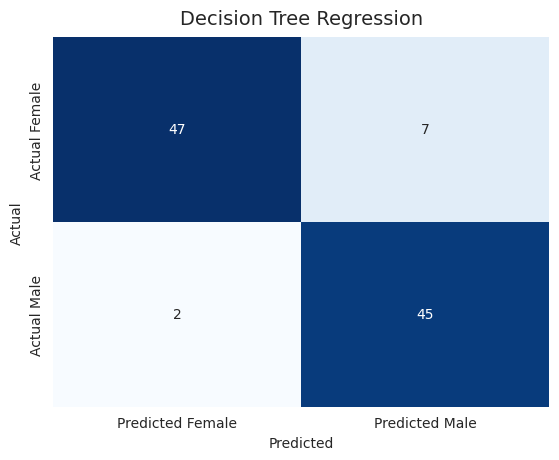

In [27]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Female', 'Predicted Male'],
            yticklabels=['Actual Female', 'Actual Male'])
plt.text(0.5, 1.05, 'Decision Tree Regression', size=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

# Random Forest Regression

In [28]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
regressor.fit(X, y.ravel())

RandomForestRegressor(random_state=0)

### Predicting

In [29]:
y_pred = regressor.predict(X_test)
y_pred = np.where(y_pred >= .5, 1, 0)
print(y_pred)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0]


### Confusion Matrix & Accuracy

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# print(cm)
correct_predictions = np.trace(cm)
total_predictions = np.sum(cm)
accuracy = correct_predictions / total_predictions
accuracyArray.append(accuracy)
print("Accuracy from confusion matrix:", accuracy)

Accuracy from confusion matrix: 0.6633663366336634


## Visualizing

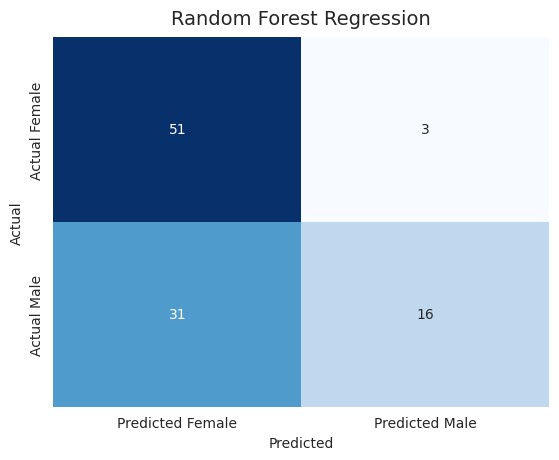

In [31]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Female', 'Predicted Male'],
            yticklabels=['Actual Female', 'Actual Male'])
plt.text(0.5, 1.05, 'Random Forest Regression', size=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

# K-NN Classification

### Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

### Predicting

In [34]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1
 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1
 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0]


### Confusion Matrix & Accuracy

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# print(cm)
correct_predictions = np.trace(cm)
total_predictions = np.sum(cm)
accuracy = correct_predictions / total_predictions
accuracyArray.append(accuracy)
print("Accuracy from confusion matrix:", accuracy)

Accuracy from confusion matrix: 0.9405940594059405


## Visualizing

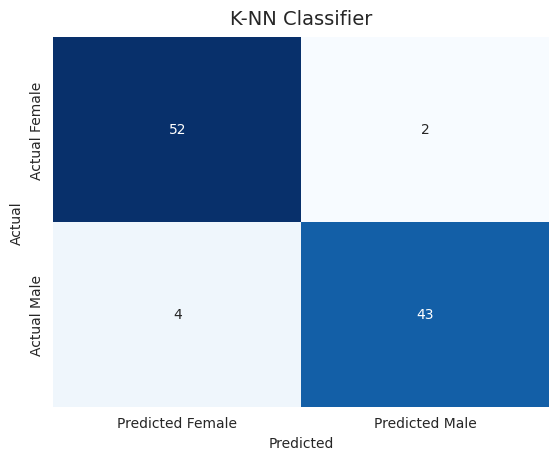

In [36]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Female', 'Predicted Male'],
            yticklabels=['Actual Female', 'Actual Male'])
plt.text(0.5, 1.05, 'K-NN Classifier', size=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

# Naive Bayes Classification

In [37]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

### Predicting

In [38]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1
 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1
 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


### Confusion Matrix & Accuracy

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# print(cm)
correct_predictions = np.trace(cm)
total_predictions = np.sum(cm)
accuracy = correct_predictions / total_predictions
accuracyArray.append(accuracy)
print("Accuracy from confusion matrix:", accuracy)

Accuracy from confusion matrix: 0.9603960396039604


## Visualizing

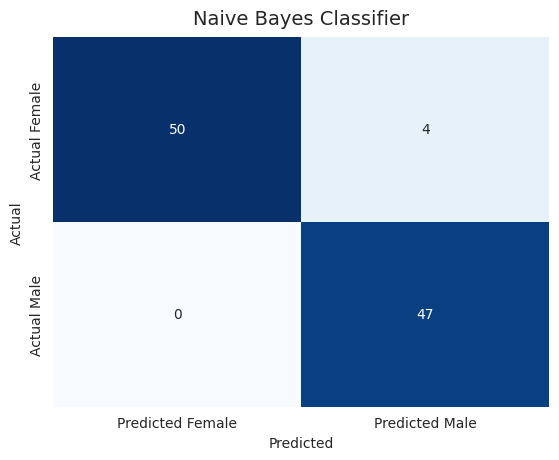

In [40]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Female', 'Predicted Male'],
            yticklabels=['Actual Female', 'Actual Male'])
plt.text(0.5, 1.05, 'Naive Bayes Classifier', size=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

# Comparing Model Results 

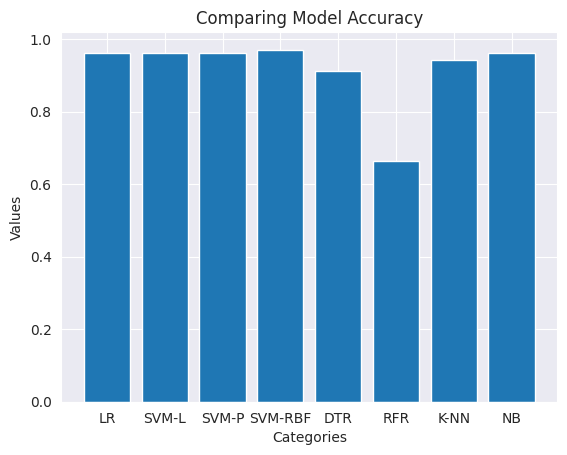

In [41]:
indices = np.arange(len(accuracyArray))
category_names = np.array(['LR', 'SVM-L', 'SVM-P', 'SVM-RBF', 'DTR', 'RFR', 'K-NN', 'NB'])

plt.bar(indices, accuracyArray)

plt.xticks(indices, category_names)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Comparing Model Accuracy')

plt.show()